In [1]:
from app.llm_module.graphs import GenerationGraph, MainGraph

In [2]:
generation_graph = GenerationGraph()
main_graph = MainGraph()

INFO:app.llm_module.graphs:Initializing GenerationGraph.
INFO:app.llm_module.graphs:Building graph structure.
INFO:app.llm_module.graphs:Graph structure built successfully.
INFO:app.llm_module.graphs:Building MainGraph structure.
INFO:app.llm_module.graphs:MainGraph structure built successfully.


In [3]:
from graphviz import Digraph
from IPython.display import Image, display


def render_langgraph_graphviz(compiled_graph, filename="langgraph_graph", format="png", show_in_notebook=True):
    dot = Digraph(format=format)

    # Цвета для разных типов узлов (можно расширить)
    type_colors = {
        "Clarifier": "#D1F2EB",
        "Verifier": "#FCF3CF",
        "X6Processor": "#FADBD8",
        "ToolNode": "#E8DAEF",  # пример на случай, если ты используешь tool-like узлы
    }

    # Узлы
    for node_id, node_info in compiled_graph.get_graph().nodes.items():
        class_name = ""
        if hasattr(node_info, "node"):
            class_name = node_info.node.__class__.__name__
        label = f"<<b>{node_id}</b><br/>{class_name}>"
        fillcolor = type_colors.get(class_name, "#f2f0ff")
        dot.node(node_id, label=label, shape="box", style="filled,rounded", fillcolor=fillcolor, fontname="Courier New")

    # Старт/конец
    if hasattr(compiled_graph, "start") and compiled_graph.start:
        dot.node("__start__", "Start", shape="circle", style="filled", fillcolor="#D6EAF8", fontname="Courier New")
        dot.edge("__start__", compiled_graph.start, penwidth="2")

    if hasattr(compiled_graph, "end") and compiled_graph.end:
        dot.node("__end__", "End", shape="doublecircle", style="filled", fillcolor="#D7BDE2", fontname="Courier New")
        dot.edge(compiled_graph.end, "__end__", penwidth="2")

    # Рёбра
    for edge in compiled_graph.get_graph().edges:
        src = edge.source
        dest = edge.target
        conditional = getattr(edge, "conditional", False)
        style = "dashed" if conditional else "bold"
        color = "#A569BD" if conditional else "#34495E"
        dot.edge(src, dest, style=style, color=color, penwidth="2")

    # Рендер
    output_path = dot.render(filename, cleanup=True)
    print(f"Graph saved as {output_path}")

    if show_in_notebook:
        display(Image(filename=output_path))

Graph saved as my_langgraph.png


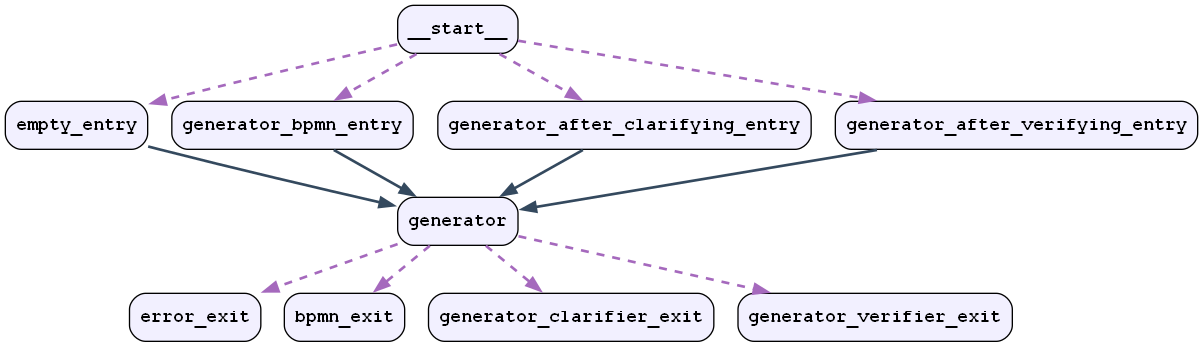

In [4]:
compiled = main_graph.graph.compile()
render_langgraph_graphviz(compiled, filename="my_langgraph")

In [22]:
from langdetect import detect_langs

detect_langs("Сделай мне диаграмму BPMN для процесса найма сотрудников")[0].lang

'ru'

In [3]:
def visualize_bpmn_graph(nodes_and_edges, filename="bpmn_graph", format="png", show=True):
    dot = Digraph(format=format)

    # Маппинг форм BPMN на формы Graphviz
    shape_map = {
        "start": "circle",
        "end": "doublecircle",
        "task": "box",
        "gateway": "diamond"
    }

    # Отдельно собираем узлы и рёбра
    nodes = [n for n in nodes_and_edges if not isinstance(n["id"], str) or not n["id"].isdigit()]
    edges = [e for e in nodes_and_edges if e.get("shape") == "bpmn-edge"]

    # Добавляем узлы
    for node in nodes:
        shape = shape_map.get(node["shape"], "box")
        label = node.get("label", str(node["id"]))
        dot.node(str(node["id"]), label=label, shape=shape, style="filled", fillcolor="#f0f0ff")

    # Добавляем рёбра
    for edge in edges:
        dot.edge(str(edge["source"]), str(edge["target"]))

    output_path = dot.render(filename, cleanup=True)
    print(f"Graph saved to {output_path}")

    if show:
        display(Image(filename=output_path))

    return output_path

In [ ]:
visualize_bpmn_graph(process_graph(
    process("""
    Мне нужно смоделировать процесс обработки заказа в интернет-магазине. Процесс начинается с того, что клиент делает заказ через сайт. После этого система должна проверить наличие товара на складе.

Если товар есть на складе, то система подтверждает заказ и передает его на отправку. Нужно учесть, что в случае подтверждения, клиенту отправляется уведомление по email, что заказ принят и отправляется.

Если товара нет на складе, то клиенту отправляется уведомление о невозможности выполнения заказа, также через email.

Включите все ключевые шаги:

начало процесса: клиент делает заказ;

проверка наличия товара на складе (условие);

два варианта:

если товар есть: подтверждение заказа и отправка;

если товара нет: уведомление клиенту о невозможности выполнения заказа;

завершение процесса.""")
)["agents_result"]["preprocessor_result"])

INFO:app.mcp.graphs:Starting ProcessGraph invocation.
INFO:app.mcp.graphs:Compiling graph.
INFO:app.mcp.graphs:Graph compiled successfully.
INFO:app.mcp.graphs:Check entry condition.
INFO:app.mcp.graphs:Entry is basic.
INFO:app.mcp.graphs:Executing verifier node.
[2025-04-15 01:29:09,850] DEBUG - verifier initialized with system prompt.
DEBUG:BaseAgent:verifier initialized with system prompt.
[2025-04-15 01:29:09,850] INFO - [verifier] Received input: 
    Мне нужно смоделировать процесс обработки заказа в интернет-магазине. Процесс начинается с того, что клиент делает заказ через сайт. После этого система должна проверить наличие товара на складе.

Если товар есть на складе, то система подтверждает заказ и передает его на отправку. Нужно учесть, что в случае подтверждения, клиенту отправляется уведомление по email, что заказ принят и отправляется.

Если товара нет на складе, то клиенту отправляется уведомление о невозможности выполнения заказа, также через email.

Включите все ключевы

In [24]:
import pandas as pd

df = pd.read_csv("app/mcp/test_files/pred_prompts_with_result.csv")
print(df.shape)
df.head()

(500, 5)


,query,language,related_bpmn,processed_result,estimated_time
0,"Конечно, вот пример запроса на русском языке:\...",Russian,True,"{'user_input': 'Конечно, вот пример запроса на...",5.694527
1,Here's a detailed user query in Russian descri...,Russian,True,{'user_input': 'Here\'s a detailed user query ...,7.319317
2,Here is a respectful and clear request in Japa...,Japanese,True,{'user_input': 'Here is a respectful and clear...,1.433269
3,Here's a detailed user query in Chinese descri...,Chinese,True,"{'user_input': ""Here's a detailed user query i...",11.568220
4,Voici un exemple détaillé de requête utilisate...,French,True,"{'user_input': ""Voici un exemple détaillé de r...",16.291180


In [55]:
import json


errors = 0
raw = df.loc[0, "processed_result"]
fixed = raw.replace('\\"', '"').replace('"Конечно, вот пример запроса на русском языке"', '')
fixed = fixed.replace('\n', ' ')  # если есть переносы
try:
    result = json.loads(fixed)
except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {e}")
    print(f"String: {fixed}")

Error decoding JSON: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
String: {'user_input': 'Конечно, вот пример запроса на русском языке:\n\n"Пожалуйста, помогите создать диаграмму BPMN для процесса обработки заказов в нашей компании. Процесс включает следующие этапы:\n\n1. Получение заказа от клиента.\n2. Проверка наличия товара на складе.\n3. Подтверждение заказа клиенту.\n4. Упаковка товара.\n5. Организация доставки.\n6. Отправка уведомления о доставке клиенту.\n7. Получение подтверждения от клиента о получении товара.\n\nБудьте добры, учтите все эти этапы и создайте соответствующую диаграмму BPMN."\n\nThis request is clear, respectful, and provides all the necessary details to create a BPMN diagram for the specified business process.', 'current': ('process', 'preprocessor_exit'), 'agents_result': {'verifier_result': {'is_bpmn_request': True, 'reason': 'nothing'}, 'clarifier_result': {'clarification_needed': False, 'clarification': 'nothing'}, 'preproces

In [6]:
import json
import uuid
from abc import ABC
from typing import Callable, List, Optional, Dict
from mistralai.models import SystemMessage, UserMessage, AssistantMessage
from app.utils.logger import setup_logger
import langid

logger = setup_logger("BaseAgent")

class BaseAgent(ABC):
    def __init__(self, system_prompt: str, llm_call: Callable,
                 context: Optional[List] = None):
        """
        :param system_prompt: Base system prompt for the agent
        :param llm_call: Function to call LLM: llm_call(messages: List[ChatMessage]) -> str
        :param context: Optional initial history as list of ChatMessage
        """
        self.system_prompt = system_prompt
        self.llm_call = llm_call
        # history of ChatMessage objects: SystemMessage, UserMessage, AssistantMessage
        self.history: List = context if context is not None else []
        logger.debug(f"{self._agent_role()} initialized. History length: {len(self.history)}")

    def __call__(self, state: Dict) -> Dict:
        user_input = state.get("user_input", "")
        logger.info(f"[{self._agent_role()}] Received input: {user_input}")

        # Append user message to history
        self.history.append(UserMessage(content=user_input))
        logger.debug(f"[{self._agent_role()}] Appended UserMessage. History length: {len(self.history)}")

        # Detect language code
        lang = langid.classify(user_input)[0]
        # Create system message including language hint
        sys_msg = SystemMessage(content=f"{self.system_prompt}{lang} language code")
        # Build messages list
        messages = [sys_msg] + self.history

        # Call LLM
        try:
            raw_response = self.llm_call(messages=messages)
            logger.debug(f"[{self._agent_role()}] LLM raw response: {raw_response}")
            response = self._process_response(raw_response)
        except Exception as e:
            logger.exception(f"[{self._agent_role()}] Error during LLM call or parsing: {e}")
            raise

        logger.info(f"[{self._agent_role()}] Parsed response: {response}")

        # Append assistant message
        self.history.append(AssistantMessage(content=raw_response))
        logger.debug(f"[{self._agent_role()}] Appended AssistantMessage. History length: {len(self.history)}")

        # Update state
        state["context"] = self.history

        # Handle awaiting further user input
        if response.get("await_user_input"):
            state["await_user_input"] = True
            logger.info(f"[{self._agent_role()}] Awaiting user input set.")

        return state

    def _agent_role(self) -> str:
        return self.__class__.__name__.lower()

    def _process_response(self, raw: str) -> Dict:
        try:
            data = json.loads(raw)
            if not isinstance(data, dict):
                raise ValueError("Response is not a JSON object")
            return data
        except json.JSONDecodeError as e:
            logger.error(f"[{self._agent_role()}] JSON decode error: {e}\nRaw: {raw}")
            raise
        except Exception as e:
            logger.error(f"[{self._agent_role()}] Response processing error: {e}")
            raise


In [7]:
from app.llm_module.base_agent import BaseAgent
from app.llm_module.llm_constants import PROMPTS, MISTRAL_API_KEY, MODELS
from mistralai import Mistral
from mistralai.models import SystemMessage
import langid
import logging
from app.utils.logger import setup_logger
import json
from typing import List, Optional

logger = setup_logger("BaseAgent", logging.DEBUG)

CLIENT = Mistral(api_key=MISTRAL_API_KEY)


def mistral_call(messages: List[dict], system_prompt: str) -> str:
    passed = False
    while not passed:
        try:
            response = CLIENT.chat.complete(
                model=MODELS["mistral"],
                messages=[SystemMessage(content=system_prompt)] + messages,
                safe_prompt=True
            )
            return response.choices[0].message.content
        except:
            passed = False

In [ ]:
from app.llm_module.agents import Verifier, Clarifier, X6Processor, Editor
from app.llm_module.llm_constants import PROMPTS, MISTRAL_API_KEY, MODELS
from app.llm_module.states import GenerationState, MainState, generation, main

verifier = Verifier()

state = generation(
    user_input="Сделай мне диаграмму BPMN для процесса найма сотрудников",
)

verifier(state)

[2025-04-18 17:00:55,430] DEBUG - verifier initialized with system prompt.
DEBUG:BaseAgent:verifier initialized with system prompt.
[2025-04-18 17:00:55,430] INFO - [verifier] Received input: Сделай мне диаграмму BPMN для процесса найма сотрудников
INFO:BaseAgent:[verifier] Received input: Сделай мне диаграмму BPMN для процесса найма сотрудников
[2025-04-18 17:00:55,438] DEBUG - [verifier] Added to history: {'role': 'user', 'content': 'Сделай мне диаграмму BPMN для процесса найма сотрудников'}
DEBUG:BaseAgent:[verifier] Added to history: {'role': 'user', 'content': 'Сделай мне диаграмму BPMN для процесса найма сотрудников'}
[2025-04-18 17:00:55,441] INFO - [verifier] Final prompt built: 
You are an expert in BPMN diagrams. Your task is to determine whether the user's request expresses an intention to generate a Business Process Model and Notation (BPMN) diagram.

Use a warm, friendly tone and include emojis where appropriate to make the response more natural and engaging 😊.

IMPORTANT:

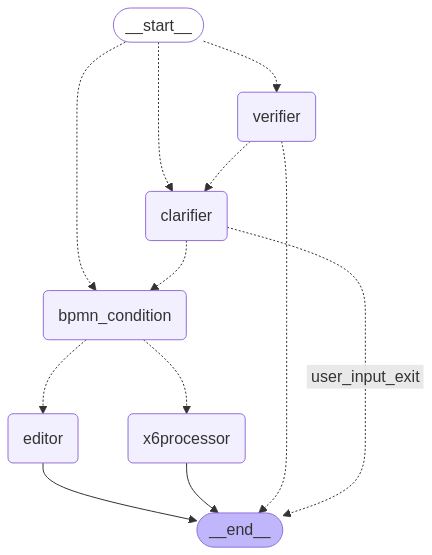

In [1]:
from app.llm_module.graphs import GenerationGraph

generation_graph = GenerationGraph()
generation_graph.graph.compile()